In [144]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [145]:
# Esse código recebe os dados em formato txt 
# salvos no repositório do projeto, e transforma em um DataFrame

experimento = {}

# gerando lista de medidas:
listaDeMedidas =[]
cont = 1.0
while cont <= 10.0: 
    listaDeMedidas.append(cont)
    cont += 0.5

sizeMedidas = len(listaDeMedidas)
for i in range(sizeMedidas):
    medida = listaDeMedidas[i]
    nomeDoAquivo = "dados/experimento6/" + str(medida) + ' m.txt'
    arquivo = open(nomeDoAquivo, 'r')
    
    dados = str()
    for linha in arquivo :
        dados = linha
        break # só estou interessado na primeira linha do arquivo
    
    # transformação de string para lista
    stringSize = len(dados)
    dados = dados[1:stringSize-2]
    dados = dados.split(', ')
    
    sizeDados = len(dados)
    difVazios = 100 - sizeDados # complementar o dataframe com valores vazios
    complementoDados = difVazios*[np.nan] 
    dados += complementoDados
    
    # converte os dados de string para tipo de dados numerico
    
    for j in range(sizeDados):
        dados[j] = int(dados[j])
    
    # criando dicionário 
    coluna = str(medida) + 'm'
    experimento[coluna] = dados

# Gerando um DataFrame
experimento = pd.DataFrame(data=experimento)
experimento

,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
0,-60,-62,-71,-62,-66,-70,-70,-72,-70,-67,-59,-65,-73,-71,-69,-67,-74,-68,-72
1,-62,-72,-73,-62,-65,-66,-71,-75,-77,-66,-65,-75,-73,-74,-60,-66,-69,-63,-67
2,-61,-62,-71,-65,-65,-73,-66,-71,-71,-64,-70,-63,-74,-75,-61,-67,-70,-67,-80
3,-61,-61,-67,-65,-68,-67,-69,-72,-73,-65,-78,-70,-66,-72,-61,-64,-72,-79,-68
4,-60,-63,-73,-66,-61,-67,-71,-74,-71,-71,-72,-71,-69,-72,-62,-67,-68,-76,-68
5,-60,-61,-74,-67,-65,-77,-71,-74,-72,-70,-62,-66,-65,-72,-61,-61,-69,-66,-67
6,-60,-71,-67,-67,-63,-65,-75,-67,-73,-67,-72,-72,-72,-70,-68,-64,-72,-65,-68
7,-63,-60,-69,-68,-68,-79,-66,-72,-80,-67,-59,-67,-70,-70,-69,-62,-68,-64,-68
8,-61,-64,-67,-64,-67,-82,-72,-77,-75,-66,-66,-70,-72,-67,-60,-66,-73,-77,-68
9,-62,-74,-70,-69,-63,-79,-69,-68,-74,-73,-66,-74,-69,-70,-63,-60,-72,-79,-72


In [146]:
descricaoDosDados = experimento.describe()

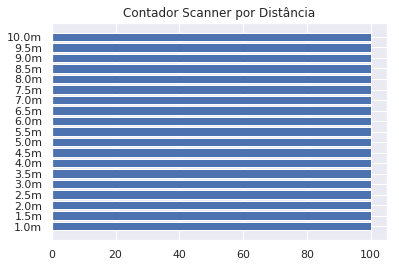

In [147]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][0])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Contador Scanner por Distância')
plt.savefig('graficocountdescribe.png')
plt.show()




In [148]:
descricaoDosDados = experimento.describe()
descricaoDosDados

,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,-59.820000,-65.380000,-70.720000,-66.710000,-64.490000,-71.530000,-69.170000,-72.960000,-75.110000,-68.420000,-67.670000,-69.200000,-70.190000,-71.740000,-62.950000,-67.020000,-71.51000,-69.240000,-71.320000
std,1.445159,4.681319,2.566608,3.075793,3.352957,4.802051,2.197588,2.502201,2.912512,2.875111,5.191397,3.578838,3.083665,2.067644,3.579896,2.998249,2.46386,6.010294,2.733555
min,-63.000000,-78.000000,-76.000000,-74.000000,-72.000000,-86.000000,-76.000000,-79.000000,-84.000000,-79.000000,-78.000000,-77.000000,-76.000000,-77.000000,-70.000000,-74.000000,-78.00000,-81.000000,-80.000000
25%,-61.000000,-69.000000,-72.250000,-69.000000,-67.000000,-75.250000,-71.000000,-74.000000,-77.000000,-70.000000,-72.000000,-72.000000,-73.000000,-73.000000,-66.000000,-69.000000,-73.00000,-76.000000,-73.000000
50%,-60.000000,-64.500000,-71.000000,-67.000000,-64.000000,-70.000000,-69.000000,-73.000000,-75.000000,-68.000000,-68.000000,-69.000000,-70.500000,-72.000000,-61.000000,-67.000000,-71.00000,-66.000000,-71.000000
75%,-59.000000,-62.000000,-69.000000,-64.000000,-62.000000,-68.000000,-68.000000,-71.000000,-73.000000,-66.000000,-63.000000,-67.000000,-68.750000,-70.000000,-61.000000,-64.750000,-70.00000,-65.000000,-69.000000
max,-57.000000,-58.000000,-66.000000,-62.000000,-59.000000,-64.000000,-65.000000,-67.000000,-69.000000,-64.000000,-58.000000,-62.000000,-63.000000,-67.000000,-58.000000,-60.000000,-65.00000,-62.000000,-66.000000


In [149]:
resultados = {'d0(m)': [], 'd(m)': [], 'β0(dB)': [],  'RSSI(dBm)' : [], "PTx(dBm)": [], 'PL(dB)': [], 'x': [], 'y': [] }

#resultados['η'] = []

d0 = 1.0 # valor fixo
d = 1.0 # distancia de medição, inicia em 1.0; 
tx = -59
f = (2.426) * math.pow(10,9)  # frenquencia do meio, Beacon BLE
c = 3 * math.pow(10,8)  
λ = c/f                 # comprimento de onda

#β0 = (4 * math.pi * d0)/ λ
#β0 = math.pow(β0,2)        # eleva ao quadrado
#β0 = 10 * math.log10(β0)      # mudando a unidade de betaZero para dB
β0 = 1.0

for i in descricaoDosDados:
    if i == '0.5m':
        continue # não estamos interessados na primeira medida; próximo 'i'
    
    RSSI = descricaoDosDados[i][5]
    pL = tx - RSSI
    
    #n = (pL - β0)/10*math.log10(d/d0)
    
    y = (pL - β0)/10
    x = math.log10(d/d0)
    
    resultados['d0(m)'].append(d0)
    resultados['d(m)'].append(d)
    resultados['RSSI(dBm)'].append(RSSI)
    resultados['PTx(dBm)'].append(tx)
    resultados['PL(dB)'].append(pL)
    #resultados['η'].append(n)
    resultados['β0(dB)'].append(β0)
    resultados['x'].append(x)
    resultados['y'].append(y)
    
    d += 0.5


resultadosDataFrame = pd.DataFrame(resultados)
resultadosDataFrame

,d0(m),d(m),β0(dB),RSSI(dBm),PTx(dBm),PL(dB),x,y
0,1.0,1.0,1.0,-60.0,-59,1.0,0.000000,0.00
1,1.0,1.5,1.0,-64.5,-59,5.5,0.176091,0.45
2,1.0,2.0,1.0,-71.0,-59,12.0,0.301030,1.10
3,1.0,2.5,1.0,-67.0,-59,8.0,0.397940,0.70
4,1.0,3.0,1.0,-64.0,-59,5.0,0.477121,0.40
5,1.0,3.5,1.0,-70.0,-59,11.0,0.544068,1.00
6,1.0,4.0,1.0,-69.0,-59,10.0,0.602060,0.90
7,1.0,4.5,1.0,-73.0,-59,14.0,0.653213,1.30
8,1.0,5.0,1.0,-75.0,-59,16.0,0.698970,1.50
9,1.0,5.5,1.0,-68.0,-59,9.0,0.740363,0.80


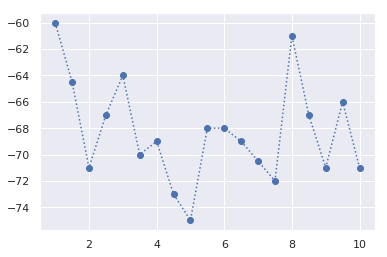

In [150]:
plt.plot(resultados['d(m)'], resultados['RSSI(dBm)'], marker='o', linestyle = ':' )

# RSSI em Função da Distância

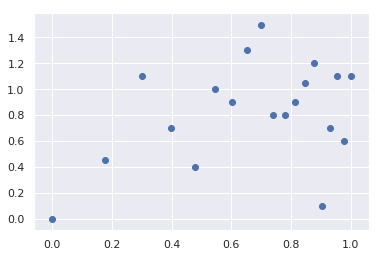

In [151]:
plt.scatter(resultados['x'], resultados['y'])

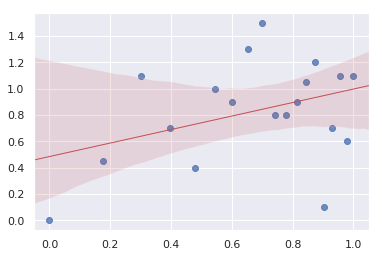

In [152]:
sns.regplot(x=resultados['x'], y=resultados['y'], line_kws={"color":"r","lw":1} )

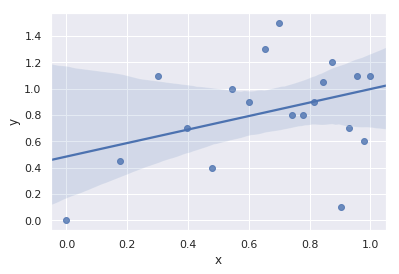

In [153]:
sns.regplot(x=resultadosDataFrame['x'], y=resultadosDataFrame["y"])

In [154]:
arquivo = open('x.txt', 'w')
for i in resultados['x']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [155]:
arquivo = open('y.txt', 'w')
for i in resultados['y']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [156]:
X = resultados['x']
y = resultados['y']

In [157]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

/home/rafaelfigueredog/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2.796
Date:                Thu, 25 Jul 2019   Prob (F-statistic):              0.113
Time:                        15:59:58   Log-Likelihood:                -7.1575
No. Observations:                  19   AIC:                             18.31
Df Residuals:                      17   BIC:                             20.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4844      0.222      2.185      0.043       0.017       0.952
x1             0.5129      0.307      1.672      0.113      -0.134       1.160
==============================================================================
Omnibus:                        1.137   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.427
Skew:                          -0.365   Prob(JB):                        0.808
Kurtosis:                       3.076   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([0.48435321, 0.57467894, 0.63876606, 0.6884759 , 0.7290918 ,
       0.76343204, 0.79317892, 0.81941753, 0.84288876, 0.86412107,
       0.88350465, 0.90133582, 0.9178449 , 0.93321449, 0.94759178,
       0.96109716, 0.97383038, 0.98587497, 0.99730161])

In [159]:
arquivo = open('pL.txt', 'w')
for i in resultados['PL(dB)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [160]:
arquivo = open('d.txt', 'w')
for i in resultados['d(m)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [161]:
η = 1.1313 # eta calculado no octave
pL = []

for d in resultados['d(m)']:
    pl = 1 + 10*η*math.log10(d)
    pL.append(pl)
    
dadosPL = {"PL":pL}
dadosPL['d'] = resultados['d(m)']
dataFramePL = pd.DataFrame(dadosPL)
dataFramePL

,PL,d
0,1.000000,1.0
1,2.992120,1.5
2,4.405552,2.0
3,5.501895,2.5
4,6.397673,3.0
5,7.155042,3.5
6,7.811105,4.0
7,8.389793,4.5
8,8.907448,5.0
9,9.375723,5.5


In [162]:
arquivo = open('pL.txt', 'w')
for p in pL:
    arquivo.write(str(p)+"\n")
arquivo.close()

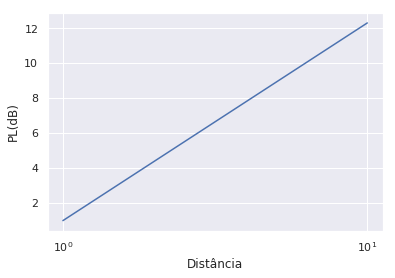

In [170]:
plt.semilogx(dataFramePL['d'],dataFramePL['PL'], basex = 10)
plt.ylabel('PL(dB)')
plt.xlabel('Distância')
plt.savefig('pL(db)Dist.png')

In [164]:
import seaborn as sns; 
tips = {'log(d)': resultados['x'], 'Dif. de Perdas: PL(d), PL(d0)':resultados['y']}
tips = pd.DataFrame(tips)

In [165]:
tips

,log(d),"Dif. de Perdas: PL(d), PL(d0)"
0,0.000000,0.00
1,0.176091,0.45
2,0.301030,1.10
3,0.397940,0.70
4,0.477121,0.40
5,0.544068,1.00
6,0.602060,0.90
7,0.653213,1.30
8,0.698970,1.50
9,0.740363,0.80


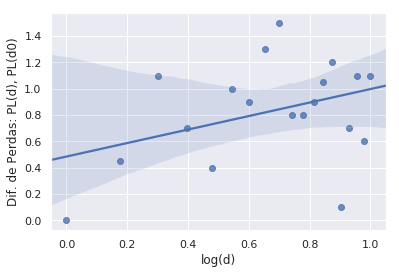

In [166]:
ax = sns.regplot(x="log(d)", y="Dif. de Perdas: PL(d), PL(d0)", data=tips)
plt.savefig('reg.png')